In [1]:
import pandas as pd
import matplotlib

In [2]:
def get_font_family():
    import platform 
    system_name = platform.system()

    if system_name == "Darwin" : # 맥
        font_family = "AppleGothic"
    elif system_name == "Windows": # 윈도우
        font_family = "Malgun Gothic"
    else: # 리눅스 및 코랩
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv
        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn") # 전체 그래프를 seaborn 스타일로 고정
plt.rc("font", family=get_font_family())
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에 마이너스 허용

%config InlineBackend.figure_format = 'retina' # 그래프를 더 선명하게 사용


plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({'font.size': 12})

NameError: name 'plt' is not defined

In [6]:
df = pd.read_excel("./data/편집_1.xlsx")

In [7]:
df

,위치,경도,위도,구분,주차면수
0,공원(동의초인근),127.097339,37.553310,주차장,21
1,광문학당,127.090237,37.547928,주차장,22
2,광장공동,127.101528,37.546423,주차장,78
3,광진광장 공영,127.079542,37.553255,주차장,162
4,구의1동 공영,127.087849,37.538253,주차장,6
...,...,...,...,...,...
97,자양4동 공영,127.068162,37.538662,장애인주차장,3
98,중곡3동 마을공원,127.084660,37.569907,장애인주차장,5
99,능동 공영,127.080217,37.554026,장애인주차장,3
100,화양동 공영,127.071155,37.545283,장애인주차장,2


In [8]:
df["구분"].value_counts()

불법주차      53
주차장       36
장애인주차장    13
Name: 구분, dtype: int64

In [10]:
import folium
from folium.plugins import MarkerCluster

In [38]:
a = folium.Map(location=[37.5383378, 127.082396], zoom_start=14)

# location = 광진구청

In [26]:
sub_df = df[["위도", "경도", "구분"]]

sub_df

,위도,경도,구분
0,37.553310,127.097339,주차장
1,37.547928,127.090237,주차장
2,37.546423,127.101528,주차장
3,37.553255,127.079542,주차장
4,37.538253,127.087849,주차장
...,...,...,...
97,37.538662,127.068162,장애인주차장
98,37.569907,127.084660,장애인주차장
99,37.554026,127.080217,장애인주차장
100,37.545283,127.071155,장애인주차장


In [36]:
sub_1 = sub_df[sub_df["구분"] == "주차장"]
sub_2 = sub_df[sub_df["구분"] == "장애인주차장"]
sub_3 = sub_df[sub_df["구분"] == "불법주차"]

In [37]:
coord1 = sub_1[["위도", "경도"]] # 주차장
coord2 = sub_2[["위도", "경도"]] # 장애인 주차장
coord3 = sub_3[["위도", "경도"]] # 불법추자

In [41]:
marker_cluster = MarkerCluster().add_to(a)

In [63]:
from sklearn.cluster import KMeans

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

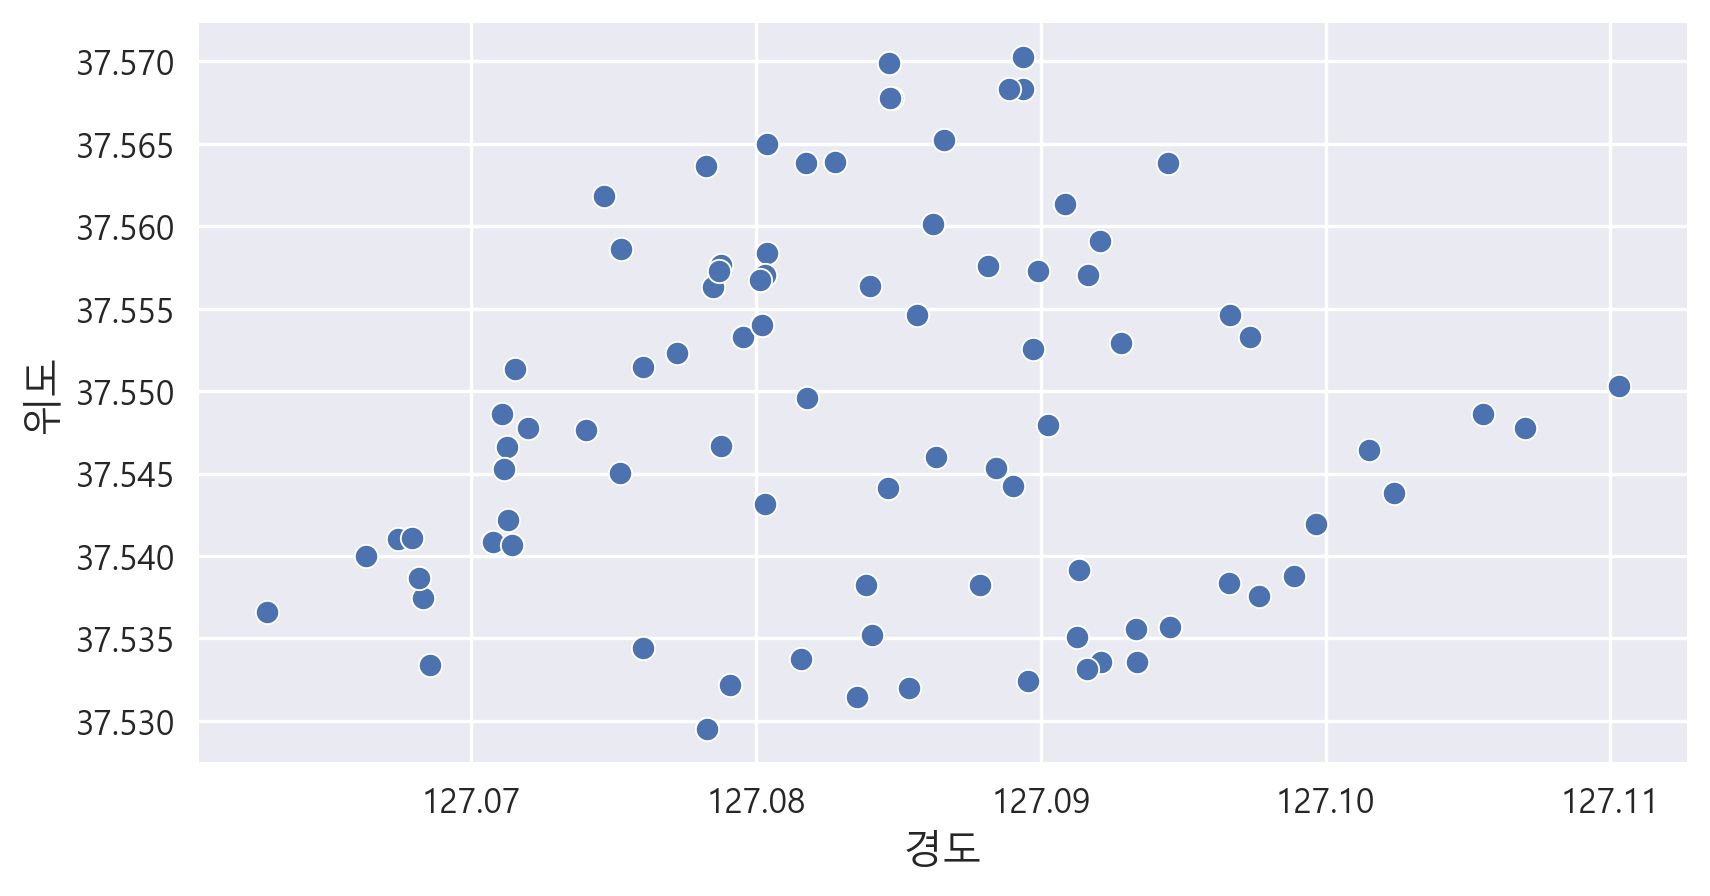

In [55]:
sns.scatterplot(x="경도", y="위도", data=df)
plt.show()

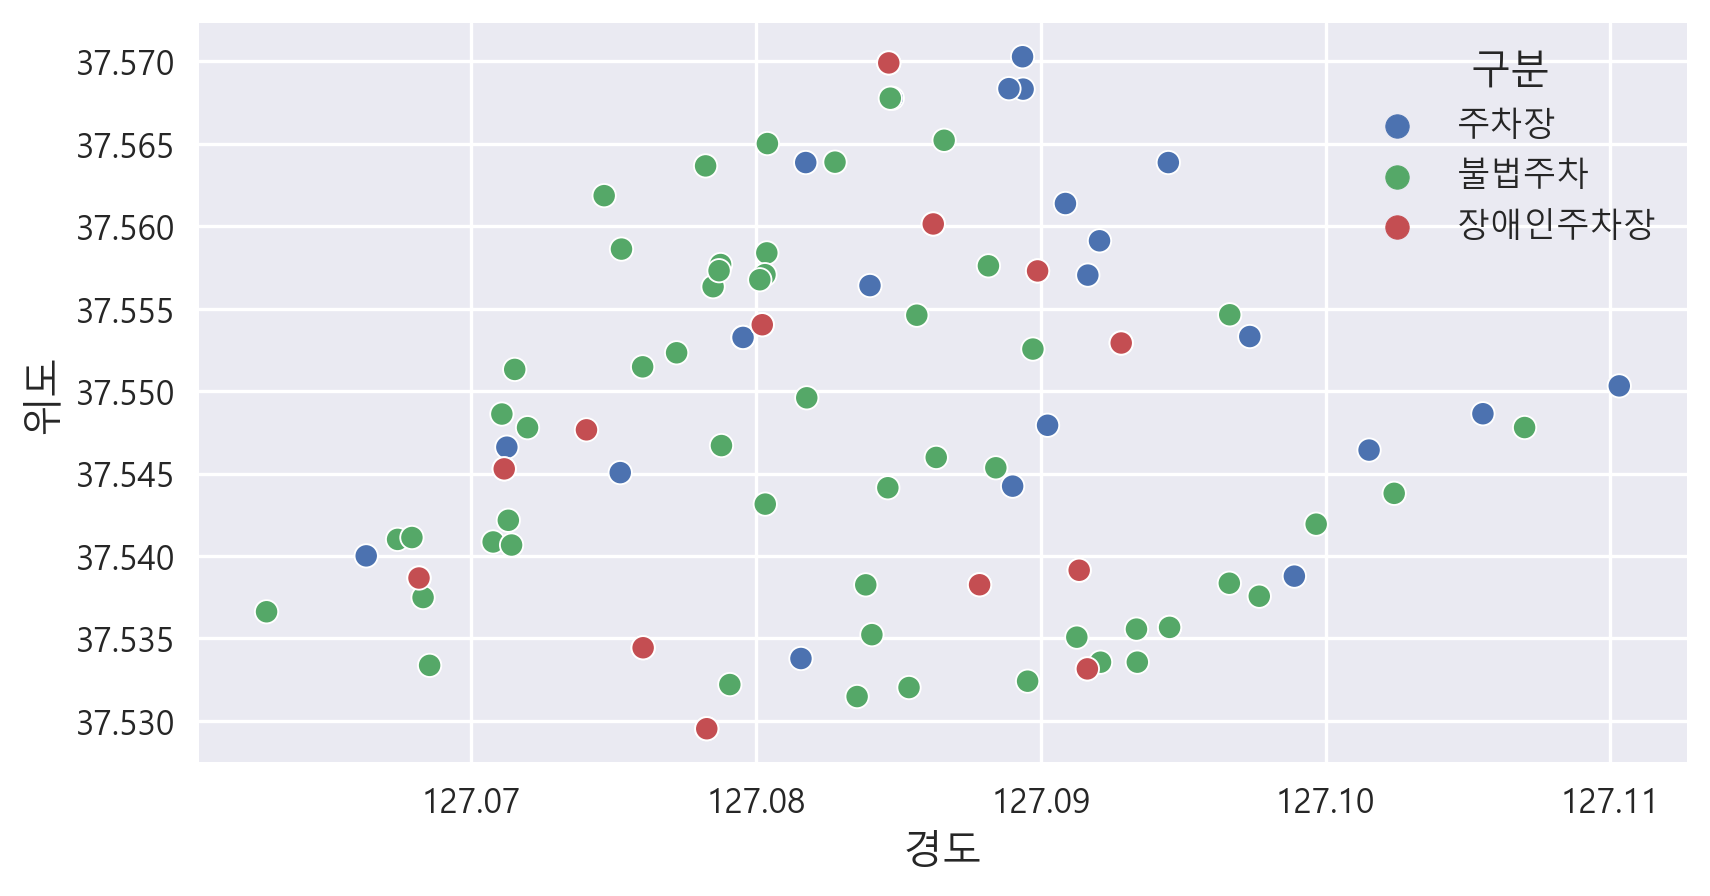

In [56]:
sns.scatterplot(x="경도", y="위도", hue="구분" ,data=df)
plt.show()

In [97]:
df_not = df[df["구분"] == "불법주차"]

In [92]:
X = df[df["구분"] == "불법주차"].drop(["위치", "구분", "주차면수"], axis=1)

In [93]:
km = KMeans(n_clusters=3)

In [94]:
pred = km.fit_predict(X)

c:\Users\DH\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DH\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [95]:
pred

array([0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0,
       2, 1, 1, 2, 1, 0, 2, 2, 2])

In [98]:
df_not["pred"] = pred

C:\Users\DH\AppData\Local\Temp\ipykernel_22256\1783638434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not["pred"] = pred


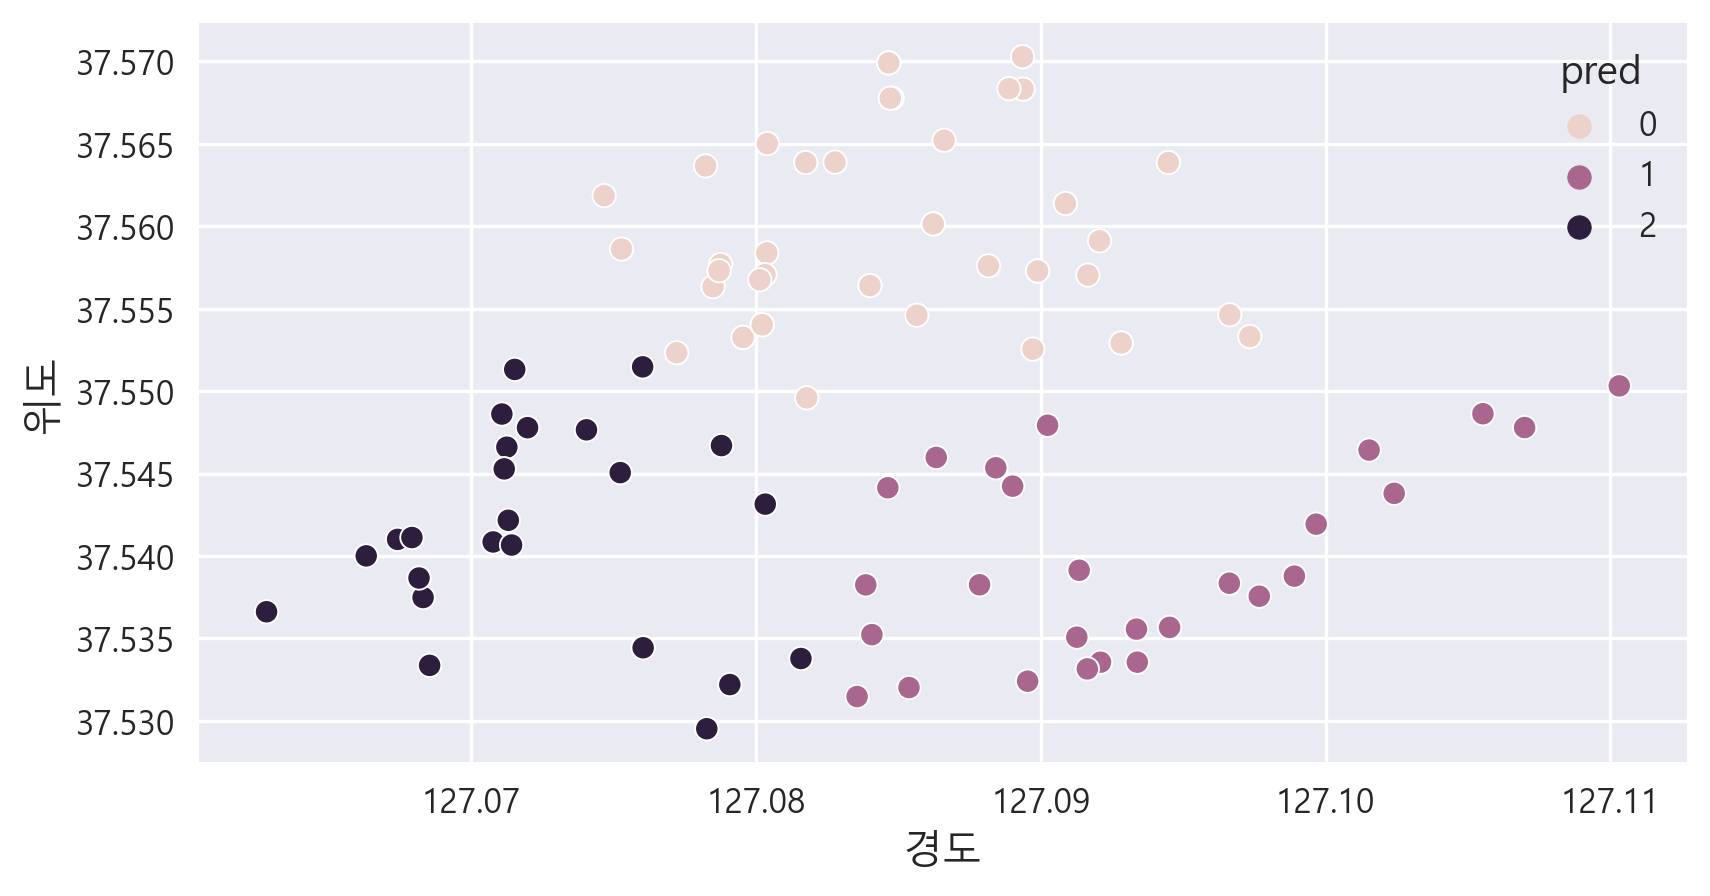

In [72]:
sns.scatterplot(x="경도", y="위도", hue="pred" ,data=df)
plt.show()

In [100]:
new_pred = df_not.groupby("pred").mean()[["경도", "위도"]]

C:\Users\DH\AppData\Local\Temp\ipykernel_22256\1342192901.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_pred = df_not.groupby("pred").mean()[["경도", "위도"]]


In [101]:
new_pred.reset_index(inplace=True)

In [102]:
new_pred

,pred,경도,위도
0,0,127.071815,37.542298
1,1,127.082030,37.558465
2,2,127.092014,37.538070


In [108]:
a = folium.Map(location=[37.5383378, 127.082396], zoom_start=14)

# location = 광진구청

marker_cluster = MarkerCluster().add_to(a)

#for lat, long in zip(coord1['위도'], coord1['경도']):
 #   folium.Marker([lat, long], popup ="주자창" , icon = folium.Icon(color="blue",)).add_to(marker_cluster)


#for lat, long in zip(coord2['위도'], coord2['경도']):
  #  folium.Marker([lat, long],popup = "장애인 주차장" ,icon = folium.Icon(color="lightblue")).add_to(marker_cluster)

for lat, long in zip(coord3['위도'], coord3['경도']):
    folium.Marker([lat, long], popup = "불법주차", icon = folium.Icon(color="red")).add_to(marker_cluster)

for lat, long in zip(new_pred["위도"], new_pred["경도"]):
    folium.CircleMarker([lat, long], color="blue",fill_color="skyblue" , radius=100).add_to(a)

In [109]:
a

In [111]:
a.save("./map.html")